In [6]:
!pip install pyarrow
!pip install keras
!pip install tsfresh
!pip install sklearn
!pip install Cython
!pip install tslearn

  Using cached https://files.pythonhosted.org/packages/0e/ee/71955f715d65afa1fc319b33dfe1976cd09a1a349af7756b232dbae85409/pyarrow-0.13.0-cp35-cp35m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/90/85/64c82949765cfb246bbdaf5aca2d55f400f792655927a017710a78445def/Keras_Applications-1.0.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c0/bf/0315ef6a9fd3fc2346e85b0ff1f5f83ca17073f2c31ac719ab2e4da0d4a3/Keras_Preprocessing-1.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7f/67/841f3620083ce2611fb6020e0f7567caaccd73a4a8d635e674abd412cf9b/tsfresh-0.11.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/6c/4b/c38b5144cf167c4f52288517436ccafefe9dc01b8d1c190e18a6b154cd4a/tqdm-4.31.1-py2.py3-none-any.whl
  Using cached https://fi

In [7]:
import gc
import pandas as pd
import matplotlib as mt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import *
from keras.models import Model

from sklearn.model_selection import train_test_split 
from keras import backend as K 
from keras import optimizers 
from keras.callbacks import  *
import pyarrow.parquet as pq
import tensorflow as tf

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
train1=pq.read_pandas('train1Scaled.parquet').to_pandas()

In [9]:
train2=train1.T

In [10]:
del train1
gc.collect

<function gc.collect>

In [11]:
meta1=pd.read_csv("metadata_train.csv")
df1=meta1.target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(train2,df1, test_size=0.33, random_state=5)

In [13]:
# from tslearn.clustering import TimeSeriesKMeans
# train22=np.array(X_train)
# test22=np.array(X_test)

# train22 = train22.reshape((train22.shape[0], 800000, 1))
# test22 = test22.reshape(test22.shape[0],800000,1)

In [14]:
del train2
gc.collect

<function gc.collect>

In [15]:
# if metric="dtw" doesn't work, try "softdtw" and if not then use "euclidean"
# kmEu = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, verbose=False, random_state=0).fit(train22)


In [16]:
# pred6=kmEu.fit_predict(test22)

In [33]:
# print(kmEu)
print(pred6.columns)

Index(['Unnamed: 0', '0'], dtype='object')


In [18]:
# kmdtw.score(pred6,y_test)

In [19]:
# pd.DataFrame(pred6).to_csv("kmEu.csv")

In [20]:
# !gsutil cp 'vsbKmeans.ipynb' gs://pitt_ml_pd

In [21]:
# kmEu.get_params

In [22]:
# plt.plot(pred6.ravel())
# plt.plot(kmEu.cluster_centers_.ravel())
# plt.title("Euclidean $k$-means")

# plt.tight_layout()
# plt.show()

In [23]:
# plt.scatter(pred6.ravel(),kmEu.cluster_centers_.ravel())
# plt.title("Euclidean $k$-means")
# plt.tight_layout()
# plt.show()

In [24]:
# if metric="dtw" doesn't work, try "softdtw" and if not then use "euclidean"
# kmsoftdtw = TimeSeriesKMeans(n_clusters=2, metric="softdtw", max_iter=3, verbose=False, random_state=0).fit(train22)


In [25]:
# kmsoftdtw.get_params

In [27]:
pred6=pd.read_csv('kmEu.csv')

In [28]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [36]:
cm = confusion_matrix(y_test, pred6['0'])

In [38]:
#K-Means Cross Validated:
print(cm)

[[1429 1276]
 [  85   85]]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


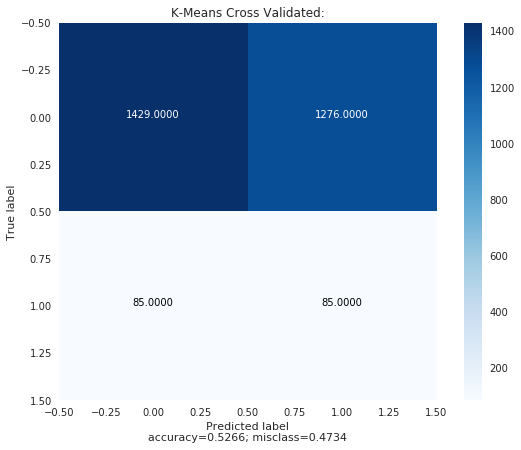

In [52]:
import itertools

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("K-Means Cross Validated:")
plt.colorbar()

# tick_marks = np.arange(len(target_names))
# plt.xticks(tick_marks, target_names, rotation=45)
# plt.yticks(tick_marks, target_names)

thresh = cm.max() / 1.5 #if normalize else cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

#   if normalize:
    plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

plt.grid(b=None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()